# Import Module

In [35]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
url = "https://raw.githubusercontent.com/indrasetiadhip/data-task-sample/main/data-sample.json"

response = requests.get(url)

if response.status_code == 200:
    data = json.loads(response.content.decode())
    print('Request Success')
else:
    data = None
    print('Request Failed')
    
df = pd.json_normalize(data).set_index('taskId')
df.head()

Request Success


,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
taskId,,,,,,,,,,,,,,,,,
4fe3b237c832ca4841a2,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
08a4da25256affae8446,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2ff0dc469826158b7684,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
331c172c2b383f774328,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
a9d53fa96c80baee8b23,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8334 entries, 4fe3b237c832ca4841a2 to cdb90c597655282306fd
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taskCreatedTime                8334 non-null   object 
 1   taskAssignedTo                 8333 non-null   object 
 2   taskCompletedTime              7566 non-null   object 
 3   taskStatus                     8334 non-null   object 
 4   flow                           8334 non-null   object 
 5   taskLocationDone.lon           7566 non-null   float64
 6   taskLocationDone.lat           7566 non-null   float64
 7   cod.amount                     2358 non-null   float64
 8   cod.received                   2358 non-null   object 
 9   UserVar.branch_dest            8334 non-null   object 
 10  UserVar.taskStatusLabel        7572 non-null   object 
 11  UserVar.receiver_city          8282 non-null   object 
 12  UserVar.taskDetail

The sample data consist of **17 Fields** and **8334** entries.

Based on the information above there are many null entries especially in cod.amount and cod.received fields. The data type for each of field shown here can alse be conversed in advance to help visualization and analyzation process.

# Exploratory Data Analysis

In [39]:
#sort columns for easier analysis
#drop flow column since this fields provides no information
df = df[['taskCreatedTime', 'taskCompletedTime', 'taskAssignedTo', 'taskStatus', 'taskLocationDone.lon', 
        'taskLocationDone.lat', 'cod.amount', 'cod.received', 'UserVar.taskStatus', 
        'UserVar.taskStatusLabel', 'UserVar.taskDetailStatus', 'UserVar.taskDetailStatusLabel',
        'UserVar.branch_origin', 'UserVar.branch_dest', 'UserVar.weight', 'UserVar.receiver_city',
       ]]

In [40]:
#formating datatype
df['taskCreatedTime'] = pd.to_datetime(df['taskCreatedTime'], utc=True).dt.tz_convert('Asia/Jakarta')
df['taskCompletedTime'] = pd.to_datetime(df['taskCompletedTime'], utc=True).dt.tz_convert('Asia/Jakarta')
df['UserVar.weight'] = pd.to_numeric(df['UserVar.weight'])

#New column containing duration of each task
deliveryDuration = df['taskCompletedTime']-df['taskCreatedTime']
df.insert(loc=2, column='taskDuration', value=deliveryDuration)

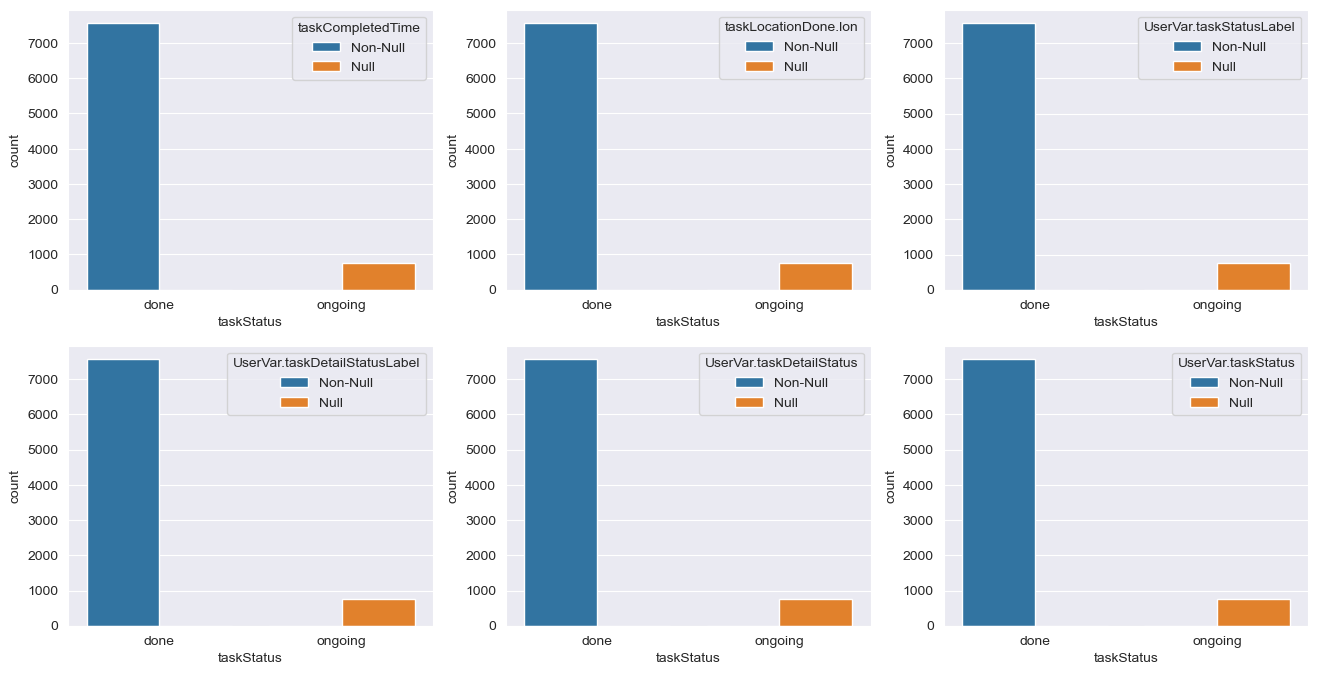

In [41]:
#plotting null entries in dataframe to see it's relationship with task status
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
row = 0
col = 0
cols = ['taskCompletedTime', 'taskLocationDone.lon', 'UserVar.taskStatusLabel', 
        'UserVar.taskDetailStatusLabel', 'UserVar.taskDetailStatus', 'UserVar.taskStatus'
       ]
sns.set_style('darkgrid')
for col_name in cols:
    sns.countplot(x=df['taskStatus'], hue=df[col_name].isnull(), ax=axes[row, col])
    axes[row, col].legend(title=col_name, labels=['Non-Null', 'Null'])
    
    col += 1
    if col == 3:
        row += 1
        col = 0
        
plt.show()

`sns.barplot()` used here to see the relationship of to categorical field/variable in the dataframe. X axis is the _taskStatus_ which gives information about current situation of the task. _taskStatus_ has 2 values: 
- **done**: the task is completed
- **ongoing**: the task still on progress

The y axis shows the number of all entries including null entries from other column shown at each of the plot legend. **Blue** bar represent **Non-Null** entry, while **orange** bar represent **Null** entry. Based from this visualization, **every Null entry lies on ongoing task**. 

So, I can assume that **Null entry in the data is because the task is not yet completed**. Therefore, it is safer to consider dropping these Null rows rather than fill it with incorrect assumptions.

* * * * *

Both _cod.amount_ and _cod.received_ fields contains information for the CoD system. Since both fields have **5976** Null entries at the same row, i decide to assume _cod.amount_ and _cod.received_ as CoD System on the analysis below.

There are 2 reason that caused so many null entries in CoD System:
1. tasks are still ongoing as in the Null analysis above, so information is not yet available.
2. entry intentionally left blank due to the use of other payment systems other than CoD System

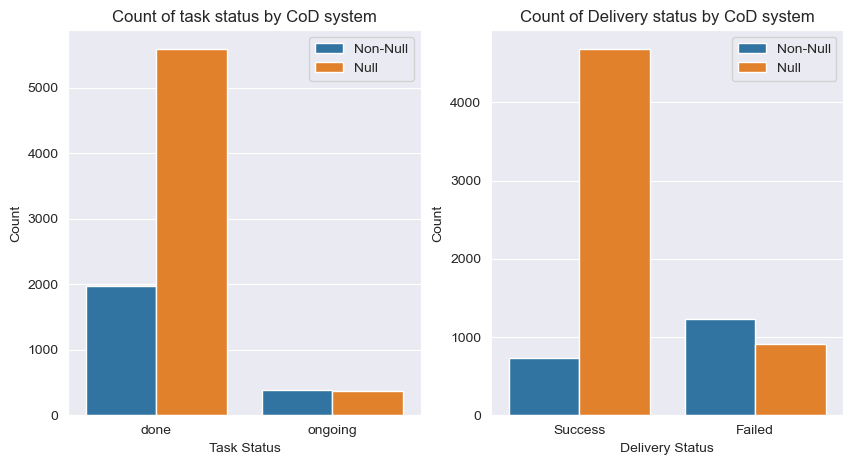

In [42]:
#Plotting CoD system entry against task status and delivery status
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.countplot(x=df['taskStatus'], hue=df['cod.amount'].isnull(), ax=ax1)
sns.countplot(x=df['UserVar.taskStatusLabel'], hue=df['cod.amount'].isnull(), ax=ax2)

ax1.set(ylabel='Count', title='Count of task status by CoD system')
ax1.set(xlabel='Task Status')
ax1.legend(title='CoD data', loc='upper right')
ax1.legend(labels=['Non-Null', 'Null'])
ax2.set(ylabel='Count', title='Count of Delivery status by CoD system')
ax2.set(xlabel='Delivery Status')
ax2.legend(title='CoD', loc='upper right')
ax2.legend(labels=['Non-Null', 'Null'])

plt.show()

In the above barplot the **blue bars** indicate **Non-Null** entries while the **orange bars** indicate **Null entries**. the barplot shows relationship of _CoD system_ from _cod_ field with _Task Status_ from _taskStatus_ column and _Delivery Status_ from _UserVar.taskStatusLabel_ column.

From this information we can see that there are many null entries in the cod system even though the _Task Status_ is _done_. In addition, the _Success_ Delivery Status mostly contains Null data and some _Failed_ Delivery Status also contains Null data on the CoD System.

Since most of delivery is already completed (failed delivery are considered complete), then the reason is high-likely because:
1. ~~tasks are still ongoing as in the Null analysis above, so information is not yet available.~~
2. entry intentionally left blank due to the use of other payment systems other than CoD System

From this conclusion I decided to create a new set of column that provides additional information 

In [43]:
#New field containing payment method
df['cod.received']
paymentMethod = df['cod.received'].isnull().map({False: 'CoD', True: 'Prepayment'})

df.insert(loc=7, column='paymentMethod', value=paymentMethod)

In [44]:
df['UserVar.taskDetailStatusLabel'] = df['UserVar.taskDetailStatusLabel'].fillna('')
df.loc[df['UserVar.taskDetailStatusLabel'].str.contains('COD'), ['paymentMethod']] = 'CoD'

## Data Analysis

### Payment Method Analysis

In [45]:
# Create new df for easier analysis
df_pma = df[['paymentMethod', 'UserVar.taskStatusLabel', 'UserVar.taskDetailStatusLabel']].reset_index(drop='taskId')
df_pma['UserVar.taskStatusLabel'] = df_pma['UserVar.taskStatusLabel'].fillna('Ongoing')

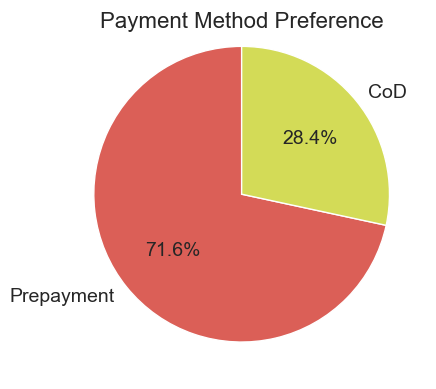

In [46]:
#plot piechart to see payment method distribution
valueCounts = df_pma['paymentMethod'].value_counts()

colors = sns.color_palette('hls')[0:2]
plt.pie(valueCounts, 
        labels=valueCounts.index,
        colors=colors,
        autopct='%1.1f%%', 
        startangle=90,
        textprops={'fontsize': 14},)
plt.title('Payment Method Preference', fontsize = 16, y = 0.93)

plt.show()

_Pie Chart_ above shows customer(user) payment method preference. 
**71.6% of 8334 customer prefer to use Prepayment** method to pay for their package while the rest **28.4% prefer to use CoD system**. Now, we have to look which payment methods are better for the company.

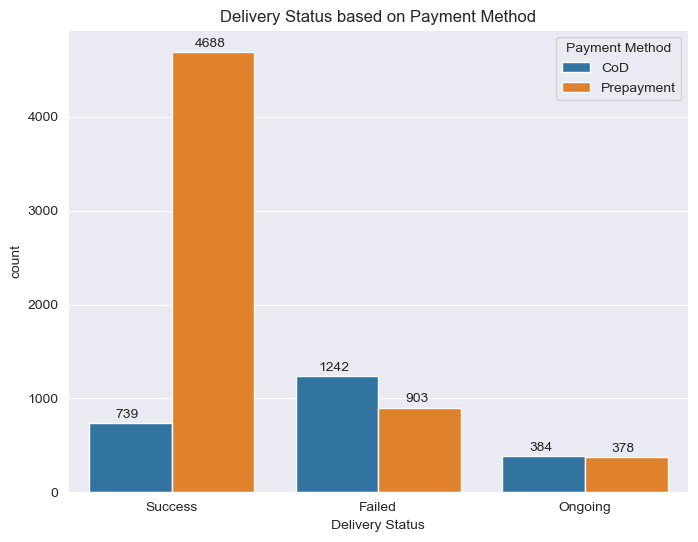

In [47]:
#plot barplot to help comparing between Prepayment and CoD
plt.figure(figsize=(8, 6))

order = ['Success', 'Failed', 'Ongoing']
ax=sns.countplot(x='UserVar.taskStatusLabel', hue='paymentMethod', data=df_pma, order=order)
plt.title('Delivery Status based on Payment Method')
plt.legend(title='Payment Method')
plt.xlabel('Delivery Status')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center',
                xytext = (-2, 6), 
                textcoords = 'offset points')

Since there are no data about amount of money received from prepayment payment method. I used the package delivery success rate based on the payment type used. Based on the barplot above, the following information is obtained:
1. There were 4688 successful deliveries out of 5976 deliveries using prepayment -- **(Success Rate: 78.44%)**
2. There were 739 successful deliveries out of 2358 deliveries using CoD -- **(Success Rate: 31.34%)**
3. There were 910 delivery failure using prepayment -- **(Failure Rate: 15.23%)**
4. There were 1235 delivery failure using CoD -- **(Failure Rate: 52.37%)**
5. while the rest deliveries are still ongoing

From this information we can see that Prepayment method has higher delivery Success Rate with lower Failure than CoD. So, **Prepayment will be much more beneficial for the company** since it has has lower risk percentage

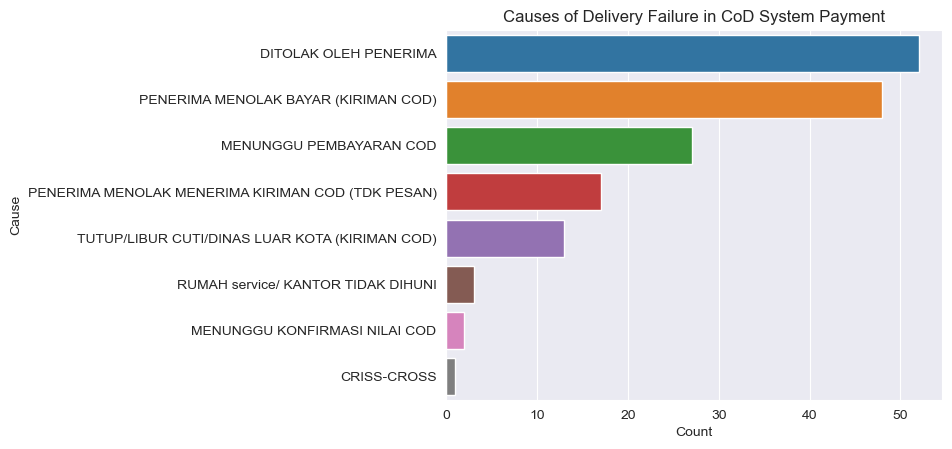

In [48]:
failedPrepaymentCause = df_pma.loc[(df_pma['UserVar.taskStatusLabel']=='Failed') & 
                                   (df_pma['paymentMethod']=='Prepayment')
                                  ]

failedCoDCause = df_pma.loc[(df_pma['UserVar.taskStatusLabel']=='Failed') & 
                            (~df_pma['UserVar.taskDetailStatusLabel'].isin(failedPrepaymentCause['UserVar.taskDetailStatusLabel']))
                           ]

failedCoDCause = failedCoDCause.groupby('UserVar.taskDetailStatusLabel').size().sort_values(ascending=False)

sns.barplot(x=failedCoDCause.values, y=failedCoDCause.index)
plt.title('Causes of Delivery Failure in CoD System Payment')
plt.xlabel('Count')
plt.ylabel('Cause')
plt.show()

__The Barplot__ above shows the causes of delivery failures that are only found in the CoD payment system. It can be seen in some cases, the customer refuses to accept the package or even refuses to pay for the package.

This is the reason why prepayment has higher success rate, while CoD has higher failur rate

### Branch Analysis

In [49]:
df_ba = df[['taskDuration', 'taskAssignedTo', 'UserVar.taskStatusLabel', 'UserVar.taskDetailStatusLabel', 'UserVar.branch_origin', 'UserVar.branch_dest']]
df_ba['origin_dest'] = df_ba['UserVar.branch_origin'] + '-' + df_ba['UserVar.branch_dest']

In [50]:
top_5_origin = df_ba['UserVar.branch_origin'].value_counts().nlargest(5)
top_5_dest = df_ba['UserVar.branch_dest'].value_counts().nlargest(5)
top_5_route = df_ba['origin_dest'].value_counts().nlargest(5)

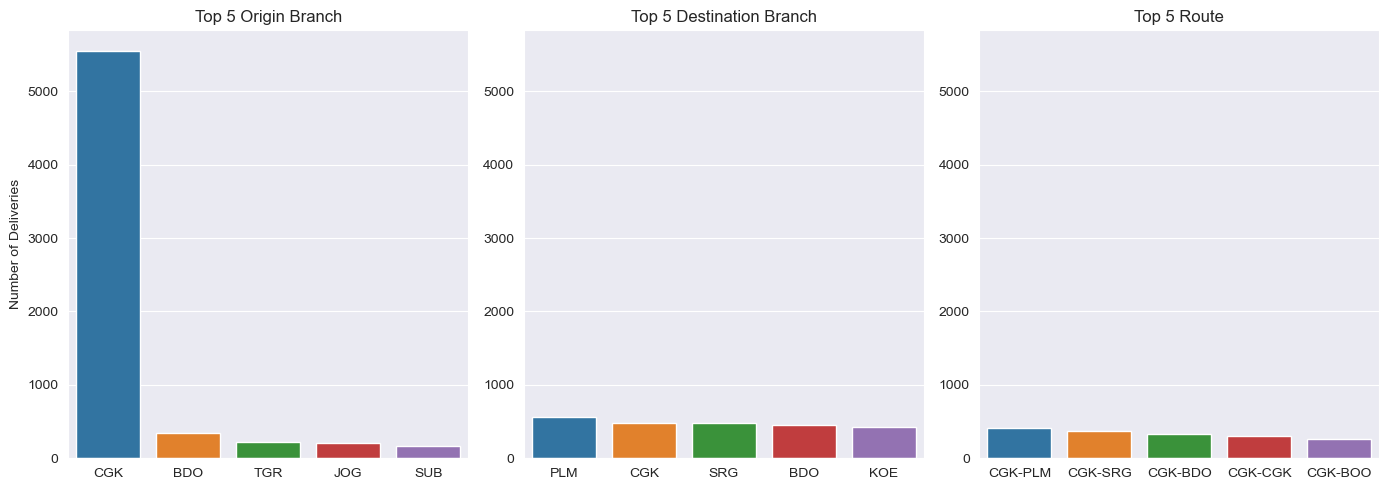

In [51]:
fig, axs = plt.subplots(ncols=3, figsize=(14,5))

sns.barplot(x=top_5_origin.index, y=top_5_origin.values, ax=axs[0])
axs[0].set_title('Top 5 Origin Branch')
axs[0].set_ylabel('Number of Deliveries')

sns.barplot(x=top_5_dest.index, y=top_5_dest.values, ax=axs[1])
axs[1].set_title('Top 5 Destination Branch')
axs[1].set_ylim(axs[0].get_ylim())

sns.barplot(x=top_5_route.index, y=top_5_route.values, ax=axs[2])
axs[2].set_title('Top 5 Route')
axs[2].set_ylim(axs[0].get_ylim())

plt.tight_layout()
plt.show()

__barplots__ above shows that the CGK branch is the highest package delivery branch with more than 5000 deliveries far above the other branches. While the top 5 destination branches are more evenly distributed as shown in __Top 5 Destination Branch Barplot__. The __Top 5 Route__ barplot also showed the same, but the top 5 route to do deliveries are all started from CGK branch

from this information there are several strategies that can be taken to improve business efficiency and effectiveness, including:
1. Improve logistics by increasing units and services at the CGK branch
2. Optimize inventory management at branches of origin or branches of destination that have high delivery intensity to ensure that the business can meet demand
3. Optimize delivery route by finding the most effiecient route to deliver package especially the most used routes as shown in the chart above

In [52]:
df_failed = df_ba[df_ba['UserVar.taskStatusLabel'] == 'Failed']

# Select top 5 destinations with highest failed shipments and its top 3 failure reason
top5_dest_failed = df_failed['UserVar.branch_dest'].value_counts().nlargest(5).index.tolist()
top3_reason_failed = df_failed.loc[df_failed['UserVar.branch_dest'].isin(top5_dest_failed), 
                                   'UserVar.taskDetailStatusLabel'
                                  ].value_counts().nlargest(3).index.tolist()

failed_reason_counts = df_failed[df_failed['UserVar.branch_dest'].isin(top5_dest_failed)]
failed_reason_counts = failed_reason_counts.groupby(['UserVar.branch_dest', 
                                                     'UserVar.taskDetailStatusLabel'
                                                    ]).size().reset_index(name='count')
failed_reason_counts = failed_reason_counts[failed_reason_counts['UserVar.taskDetailStatusLabel'
                                                                ].isin(top3_reason_failed)]

In [53]:
# Pivot table to reshape the data for plotting
failed_reason_pivot = failed_reason_counts.pivot(index='UserVar.branch_dest', 
                                                 columns='UserVar.taskDetailStatusLabel', 
                                                 values='count').fillna(0)
failed_reason_pivot = failed_reason_pivot.reindex(top5_dest_failed)

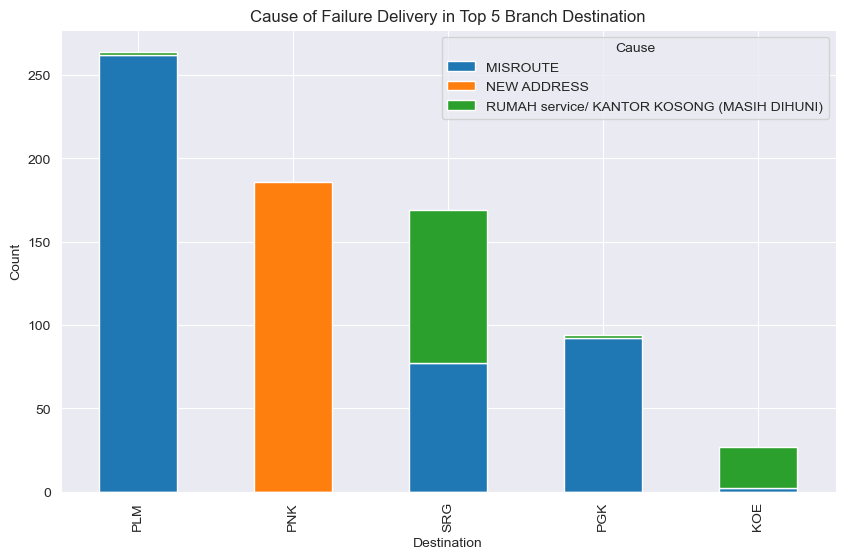

In [54]:
#Plot 3 main cause of failed delivery in destination branch with most failed deliveries
failed_reason_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cause of Failure Delivery in Top 5 Branch Destination')
plt.legend(title='Cause')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()

__Stacked Bar Chart__ above shows top 5 branch destination with the most failed delivery case. There are 3 different color used in this chart.
- **Blue** represent number of fail case due to Misroute problem
- **Orange** represent number of fail case due to the user new address
- **Green** represent number of fail case due to empty house/office (no recipient)

From this chart we can see that Misrouting is causing big trouble in PLM, SRG and PGK branch. Misrouting can be caused by errors in the system, operational issues, track conditions, or human error. Meanwhile, new address problems and empty house/office problems generally occur due to human error. These three problems can be prevented or mitigated by the company with these solutions:
1. Company needs to verify user address by using online address verification services
2. Improve communication with customers by providing regular updates on the status of their packages.
3. Company can develop mapping tools to plan the most efficient routes, and reducing the risk of misrouting due to closed road. This tools can also help to track packages, allowing corrective action to be taken before the package is lost or delivered to the wrong address

# Pre-Processing

### Cleaning & Encoding

In [55]:
df_clean = df.copy()
df_clean = df_clean.drop(['taskCreatedTime', 'taskCompletedTime', 'taskStatus',
                          'cod.amount', 'cod.received', 'UserVar.taskStatus', 
                          'UserVar.taskDetailStatus', 'UserVar.taskDetailStatusLabel',
                         ], axis=1).dropna().reset_index(drop=True)

df_clean = df_clean.rename(columns=lambda x: x.replace('UserVar.', ''))

df_clean['taskDuration'] = (df_clean['taskDuration'].dt.total_seconds()/60).round(2)
df_clean['paymentMethod'] = df_clean['paymentMethod'].map({'CoD': 1, 'Prepayment':0})
df_clean['taskStatusLabel'] = df_clean['taskStatusLabel'].map({'Success': 1, 'Failed': 0})

In [56]:
receiver_cities = []
for location in df_clean['receiver_city']:
    if ',' in location:
        city = location.split(',')[1].strip()
    else:
        city = location
    receiver_cities.append(city)
    
df_clean['receiver_city'] = receiver_cities

In [57]:
cat_columns = ['taskAssignedTo', 'branch_origin', 'branch_dest', 'receiver_city']

for column in cat_columns:
    one_hot = pd.get_dummies(df_clean[column], prefix=column)
    df_clean = df_clean.drop(column, axis = 1)
    df_clean = df_clean.join(one_hot)

In [58]:
df_clean

,taskDuration,taskLocationDone.lon,taskLocationDone.lat,paymentMethod,taskStatusLabel,weight,taskAssignedTo_abjectAntelope0,taskAssignedTo_abjectCaribou1,taskAssignedTo_abjectCur0,taskAssignedTo_abjectFerret4,...,receiver_city_WASUPONDA KAB.LUWU T,receiver_city_WATA,receiver_city_WATAMPONE,receiver_city_WATES,receiver_city_WOHA,receiver_city_WONOSARI,receiver_city_WONOSOBO,receiver_city_YOGYAKAR,receiver_city_YOGYAKART,receiver_city_YOGYAKARTA
0,29.07,109.762910,-6.926608,1,1,13.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,232.68,110.033986,-7.876154,1,1,1.300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,300.83,109.999733,-7.849777,1,1,3.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,577.20,110.003708,-7.710998,1,1,0.625,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,130.70,110.013887,-7.829742,1,1,3.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,30.87,0.000000,0.000000,0,1,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7240,16.17,110.352054,-7.892571,0,0,1.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7241,1.18,105.664897,-5.359063,0,1,1.440,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7242,132.22,119.877173,-8.513305,1,0,0.600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Standarization

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
num_columns = ['taskDuration', 'taskLocationDone.lon', 'taskLocationDone.lat', 'weight']

df_std = scaler.fit_transform(df_clean[num_columns])
df_std = pd.DataFrame(df_std, columns=num_columns)

df_std[df_clean.columns.drop(num_columns)] = df_clean[df_clean.columns.drop(num_columns)]
df_std

,taskDuration,taskLocationDone.lon,taskLocationDone.lat,weight,paymentMethod,taskStatusLabel,taskAssignedTo_abjectAntelope0,taskAssignedTo_abjectCaribou1,taskAssignedTo_abjectCur0,taskAssignedTo_abjectFerret4,...,receiver_city_WASUPONDA KAB.LUWU T,receiver_city_WATA,receiver_city_WATAMPONE,receiver_city_WATES,receiver_city_WOHA,receiver_city_WONOSARI,receiver_city_WONOSOBO,receiver_city_YOGYAKAR,receiver_city_YOGYAKART,receiver_city_YOGYAKARTA
0,-0.433525,0.654287,-0.910337,1.680854,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.565767,0.659451,-1.170532,-0.181067,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.234947,0.658799,-1.163304,0.089469,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.948686,0.658874,-1.125275,-0.288485,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.564403,0.659068,-1.157814,0.089469,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,-0.415850,-1.436868,0.987692,-0.228808,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7240,-0.560193,0.665511,-1.175030,-0.228808,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7241,-0.707383,0.576213,-0.480798,-0.158787,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7242,0.579328,0.846979,-1.345124,-0.292464,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Selection

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
X = df_std.drop('taskStatusLabel', axis=1)
y = df_std[['taskStatusLabel']]

__taskStatusLabel__ used as the target variable for feature selection, so that we can see what predictors are the best to estimate wether the delivery will be **success** or **fail**

In [64]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [66]:
# Random Forest
rf_feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, 
                                      columns=['importance']).sort_values('importance', ascending=False)

# Gradient Boosting
gb_feature_importances = pd.DataFrame(gb.feature_importances_, index=X_train.columns, 
                                      columns=['importance']).sort_values('importance', ascending=False)

In [67]:
# Combined feature importances
feature_importances = pd.concat([rf_feature_importances, gb_feature_importances], axis=1)
feature_importances.columns = ['Random Forest', 'Gradient Boosting']

rf_top_5 = feature_importances['Random Forest'].head(5)
gb_top_5 = feature_importances['Gradient Boosting'].head(5)

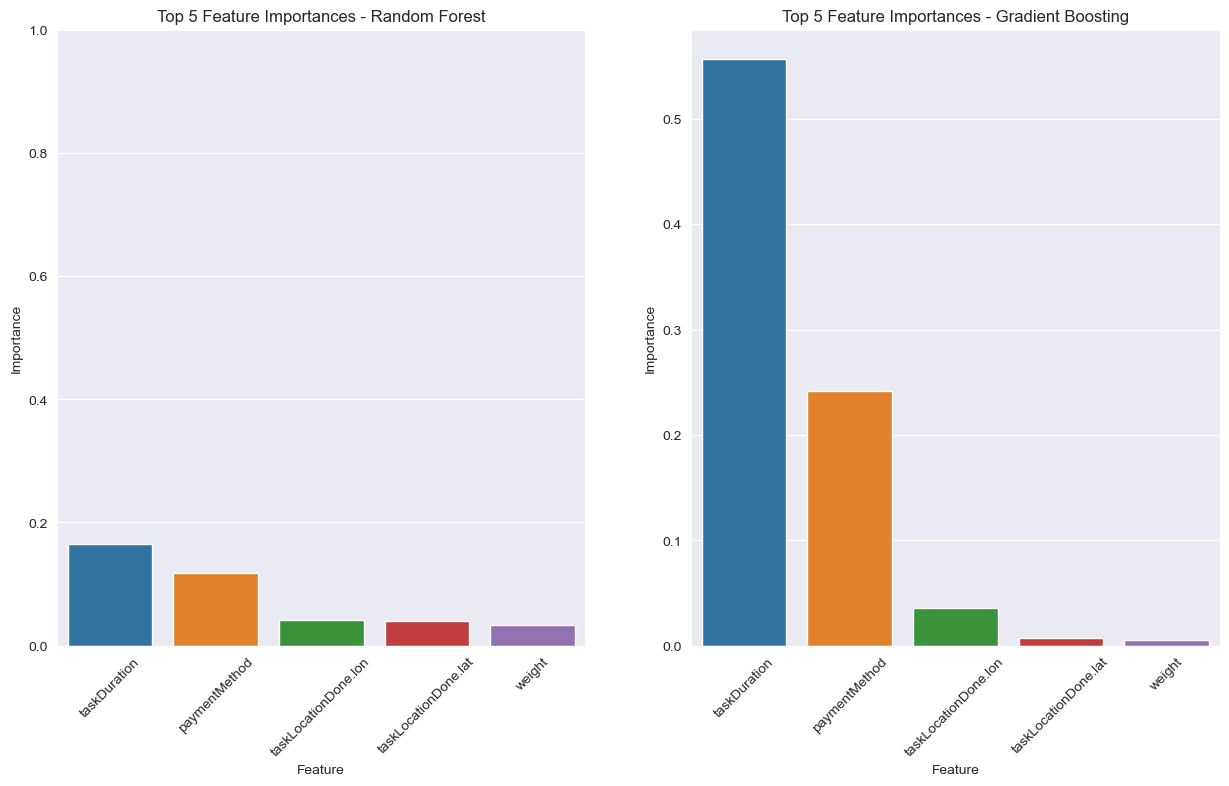

In [68]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 8))

sns.barplot(x=rf_top_5.index, y=rf_top_5.values, ax=axs[0])
axs[0].set_title('Top 5 Feature Importances - Random Forest')
axs[0].set_ylabel('Importance')
axs[0].set_xlabel('Feature')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_ylim(axs[1].get_ylim())

sns.barplot(x=gb_top_5.index, y=gb_top_5.values, ax=axs[1])
axs[1].set_title('Top 5 Feature Importances - Gradient Boosting')
axs[1].set_ylabel('Importance')
axs[1].set_xlabel('Feature')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

plt.show()

The feature selection results displayed on the barplot with the __Random Forest__ and __Gradient Boost__ algorithms show similarities, where taskDuration has the highest level of importance, followed by paymentMethod even though the import value is different.

Meanwhile, there are differences in the importance of the other 3 predictors seen from both algorithms. This means that **taskDuration and paymentMethod can be reliable predictors** in predicting taskStatus.
- - -
Based on this information, it can be concluded that the success rate of package delivery can be improved by preventing problems that affect the duration of delivery and optimizing payment methods in accordance with the results of the analysis that has been carried out. In addition, companies can also predict the success rate of delivery with algorithms based on the two predictors.